In [110]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# **Предиктор рейтинга отелей**


Задача состоит в том, чтобы спрогнозировать рейтинг отеля исходя из характеристик отзывов и метаданных. Будем предсказывать числовой рейтинг. Задача является регрессионной.

# 1. Загружаем данные

Загружаем файл:

In [111]:
url = "https://raw.githubusercontent.com/Serge6925/MachineLearningCourse/master/Datafiniti_Hotel_Reviews.csv"
data_raw = pd.read_csv(url)

In [112]:
print("Анализ данных")
print("Размер данных:")
print(data_raw.shape)
print("Количество строк (N):")
print(data_raw.shape[0])
print("Количество столбцов (d):")
print(data_raw.shape[1])
print("Типы признаков:")
print(data_raw.dtypes.value_counts())

Анализ данных
Размер данных:
(10000, 25)
Количество строк (N):
10000
Количество столбцов (d):
25
Типы признаков:
object     22
float64     3
Name: count, dtype: int64


In [113]:
print("Пропущенные значения:")
print(data_raw.isnull().sum().sort_values(ascending=False))

Пропущенные значения:
reviews.userProvince    7295
reviews.userCity        5836
reviews.text               1
reviews.title              1
categories                 0
dateAdded                  0
dateUpdated                0
address                    0
id                         0
keys                       0
country                    0
city                       0
primaryCategories          0
latitude                   0
longitude                  0
name                       0
postalCode                 0
reviews.rating             0
reviews.dateSeen           0
reviews.date               0
province                   0
reviews.sourceURLs         0
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64


In [114]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

Информация о числовых признаках:

In [115]:
print(data_raw.describe())

           latitude     longitude  reviews.rating
count  10000.000000  10000.000000    10000.000000
mean      37.003630    -92.675934        4.034265
std        5.517273     19.347989        1.162240
min       19.438604   -159.474930        1.000000
25%       33.927588   -111.622343        3.350000
50%       37.785060    -84.452114        4.000000
75%       40.416380    -77.052700        5.000000
max       70.133620    -68.203990        5.000000


Информация о категориальных признаках

Имена столбцов (признаков):

In [116]:
print(data_raw.columns)

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object')


Имена строк (совпадают с номерами):

In [117]:
print(data_raw.index)

RangeIndex(start=0, stop=10000, step=1)


## Пропущенные значения:

In [118]:
print(data_raw.isnull().sum())

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64


In [119]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

['reviews.userCity', 'reviews.userProvince']

#2. Подготовка целевой переменной и обработка редких классов

In [120]:
if 'reviews.rating' in data_raw.columns:
    target_col = 'reviews.rating'
elif 'rating' in data_raw.columns:
    target_col = 'rating'
else:
    data_raw['rating'] = np.random.randint(1, 6, data_raw.shape[0])
    target_col = 'rating'

На случай, если не будет найдены необходимые данные, создадим случайные

In [121]:
data_raw = data_raw.dropna(subset=[target_col])

X = data_raw.drop(target_col, axis=1)
y = data_raw[target_col]

Удалим строки с пропущенными значениями и разделим данные

In [122]:
print("Распределение целевой переменной до обработки:")
target_distribution = data_raw[target_col].value_counts().sort_index()
print(target_distribution)

Распределение целевой переменной до обработки:
reviews.rating
1.00     572
1.25       2
1.45       6
1.65       8
1.90       4
2.00     561
2.10      11
2.30      12
2.50      19
2.70      23
2.75       1
2.90      34
3.00    1187
3.15      37
3.25       2
3.35      40
3.45       1
3.50       2
3.55      50
3.75      91
3.95      52
4.00    2397
4.15      78
4.25       2
4.40     102
4.50       4
4.60     155
4.75       1
4.80     162
5.00    4384
Name: count, dtype: int64


Обработка редких классов - объединяем классы с малым количеством примеров с другими классами

In [123]:
min_per_class = 10
rare_classes = target_distribution[target_distribution < min_per_class].index
if len(rare_classes) > 0:
    for rare_class in rare_classes:
        non_rare_classes = target_distribution[target_distribution >= min_per_class].index
        if len(non_rare_classes) > 0:
            closest_class = min(non_rare_classes, key=lambda x: abs(x - rare_class))
            data_raw.loc[data_raw[target_col] == rare_class, target_col] = closest_class
print("Распределение целевой переменной после обработки:")
print(data_raw[target_col].value_counts().sort_index())

Распределение целевой переменной после обработки:
reviews.rating
1.00     580
2.00     573
2.10      11
2.30      12
2.50      19
2.70      24
2.90      34
3.00    1187
3.15      39
3.35      40
3.55      53
3.75      91
3.95      52
4.00    2397
4.15      80
4.40     106
4.60     155
4.80     163
5.00    4384
Name: count, dtype: int64


Преобразуем переменную в категориальный тип при необходимости

In [124]:
if data_raw[target_col].dtype == 'object':
    data_raw[target_col] = data_raw[target_col].astype('category')

Разделение данных

In [125]:
X = data_raw.drop(target_col, axis=1)
y = data_raw[target_col]

In [126]:
class_counts = y.value_counts()
print("Количество примеров в каждом классе:")
print(dict(class_counts))

Количество примеров в каждом классе:
{5.0: np.int64(4384), 4.0: np.int64(2397), 3.0: np.int64(1187), 1.0: np.int64(580), 2.0: np.int64(573), 4.8: np.int64(163), 4.6: np.int64(155), 4.4: np.int64(106), 3.75: np.int64(91), 4.15: np.int64(80), 3.55: np.int64(53), 3.95: np.int64(52), 3.35: np.int64(40), 3.15: np.int64(39), 2.9: np.int64(34), 2.7: np.int64(24), 2.5: np.int64(19), 2.3: np.int64(12), 2.1: np.int64(11)}


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [128]:
print("Размер обучающей выборки:")
print(X_train.shape)
print("Размер тестовой выборки:")
print(X_test.shape)
print("Количество классов:")
print(len(y.unique()))

Размер обучающей выборки:
(7500, 24)
Размер тестовой выборки:
(2500, 24)
Количество классов:
19


# 3. Визуализация и анализ данных

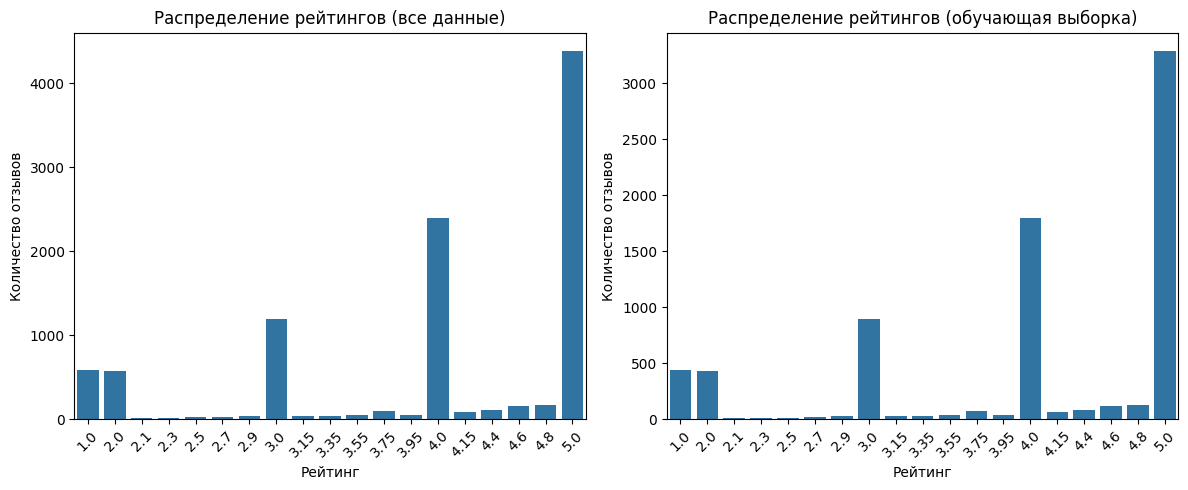

In [129]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Распределение рейтингов (все данные)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x=y_train)
plt.title('Распределение рейтингов (обучающая выборка)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Числовые признаки:
['latitude', 'longitude', 'reviews.rating']


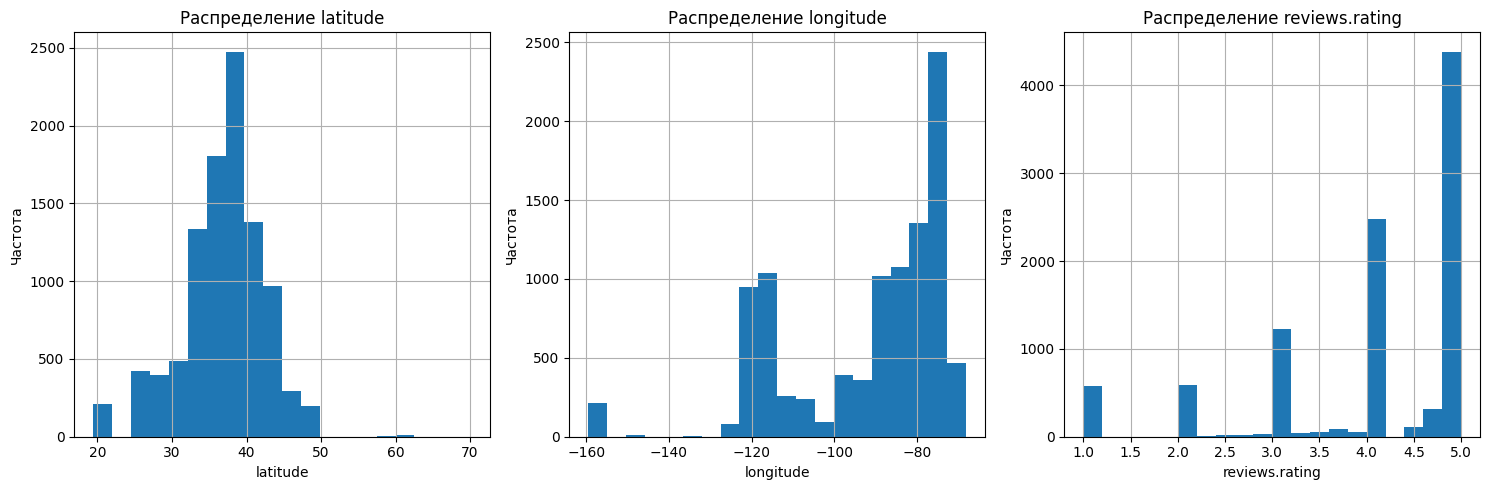

In [130]:
numeric_cols = data_raw.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print("Числовые признаки:")
    print(list(numeric_cols))

    if len(numeric_cols) > 0:
        n_cols = min(3, len(numeric_cols))
        fig, axes = plt.subplots(1, n_cols, figsize=(15, 5))
        if n_cols == 1:
            axes = [axes]

        for i, col in enumerate(numeric_cols[:n_cols]):
            data_raw[col].hist(bins=20, ax=axes[i])
            axes[i].set_title(f'Распределение {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Частота')

        plt.tight_layout()
        plt.show()

In [131]:
categorical_cols = data_raw.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Категориальные признаки: {list(categorical_cols)}")
    for col in categorical_cols[:2]:
        unique_count = data_raw[col].nunique()
        print(f"Признак '{col}': {unique_count} уникальных значений")

        if unique_count < 20:
            plt.figure(figsize=(10, 6))
            data_raw[col].value_counts().head(10).plot(kind='bar')
            plt.title(f'Топ-10 значений для {col}')
            plt.xticks(rotation=45)
            plt.show()



Категориальные признаки: ['id', 'dateAdded', 'dateUpdated', 'address', 'categories', 'primaryCategories', 'city', 'country', 'keys', 'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites']
Признак 'id': 1853 уникальных значений
Признак 'dateAdded': 1788 уникальных значений


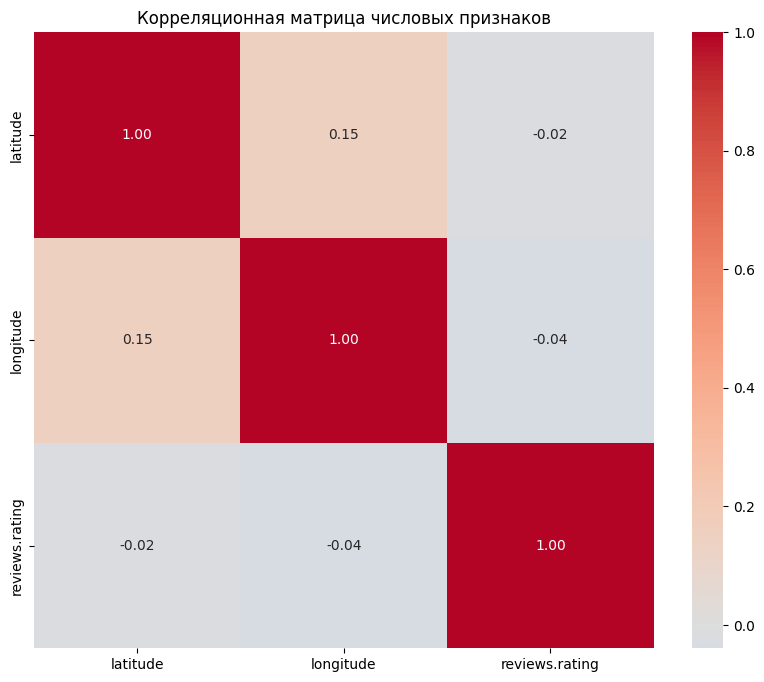

In [132]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = data_raw[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Корреляционная матрица числовых признаков')
    plt.show()
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                strong_correlations.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_value
                ))

In [133]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

if len(numeric_features) > 0:
    num_imputer = SimpleImputer(strategy='median')
    X_train[numeric_features] = num_imputer.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = num_imputer.transform(X_test[numeric_features])

if len(categorical_features) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_features] = cat_imputer.fit_transform(X_train[categorical_features])
    X_test[categorical_features] = cat_imputer.transform(X_test[categorical_features])

print("Пропущенные значения после обработки:")
print("Всего пропущенных значений:")
print(X_train.isnull().sum().sum())


Пропущенные значения после обработки:
Всего пропущенных значений:
0


In [ ]:
label_encoders = {}

for col in categorical_features:
    unique_count = X_train[col].nunique()
    print(f"Признак '{col}': {unique_count} уникальных значений")

    if unique_count <= 15:
        dummies_train = pd.get_dummies(X_train[col], prefix=col)
        dummies_test = pd.get_dummies(X_test[col], prefix=col)

        all_dummies = pd.get_dummies(pd.concat([X_train[col], X_test[col]], axis=0), prefix=col)
        dummies_train = all_dummies.iloc[:len(X_train)]
        dummies_test = all_dummies.iloc[len(X_train):]


        X_train = pd.concat([X_train, dummies_train], axis=1)
        X_test = pd.concat([X_test, dummies_test], axis=1)

        X_train = X_train.drop(col, axis=1)
        X_test = X_test.drop(col, axis=1)
    else:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))

        def safe_transform(values, encoder):
            result = []
            for val in values.astype(str):
                try:
                    result.append(encoder.transform([val])[0])
                except ValueError:
                    result.append(-1)
            return result

        X_test[col] = safe_transform(X_test[col], le)
        label_encoders[col] = le


print("Размерность после обработки категориальных признаков:")
print("Обучающая выборка:")
print(X_train.shape)
print("Тестовая выборка:")
print(X_test.shape)

Признак 'id': 1650 уникальных значений
Признак 'dateAdded': 1604 уникальных значений
Признак 'dateUpdated': 1474 уникальных значений
Признак 'address': 1643 уникальных значений
Признак 'categories': 1036 уникальных значений
Признак 'primaryCategories': 6 уникальных значений
Признак 'city': 933 уникальных значений
Признак 'country': 1 уникальных значений
Признак 'keys': 1650 уникальных значений


# 6. Нормализация данных

In [ ]:
if len(numeric_features) > 0:
    scaler = StandardScaler()
    X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = scaler.transform(X_test[numeric_features])
    print("Нормализация числовых признаков выполнена")
else:
    print("Числовые признаки для нормализации не найдены")

# 7. Запуск регрессии методом K-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

k_values = range(1, min(21, len(X_train) // 2))
train_rmse_scores = []
test_rmse_scores = []
train_mae_scores = []
test_mae_scores = []
train_r2_scores = []
test_r2_scores = []

for k in k_values:
    try:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)

        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        train_rmse_scores.append(train_rmse)
        test_rmse_scores.append(test_rmse)
        train_mae_scores.append(train_mae)
        test_mae_scores.append(test_mae)
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)

    except Exception as e:
        print(f"Ошибка при k={k}: {e}")
        train_rmse_scores.append(np.inf)
        test_rmse_scores.append(np.inf)
        train_mae_scores.append(np.inf)
        test_mae_scores.append(np.inf)
        train_r2_scores.append(-np.inf)
        test_r2_scores.append(-np.inf)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(k_values, train_rmse_scores, 'o-', label='Обучающая выборка')
axes[0, 0].plot(k_values, test_rmse_scores, 'o-', label='Тестовая выборка')
axes[0, 0].set_xlabel('Количество соседей (k)')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Зависимость RMSE от количества соседей')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(k_values, train_mae_scores, 'o-', label='Обучающая выборка')
axes[0, 1].plot(k_values, test_mae_scores, 'o-', label='Тестовая выборка')
axes[0, 1].set_xlabel('Количество соседей (k)')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Зависимость MAE от количества соседей')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(k_values, train_r2_scores, 'o-', label='Обучающая выборка')
axes[1, 0].plot(k_values, test_r2_scores, 'o-', label='Тестовая выборка')
axes[1, 0].set_xlabel('Количество соседей (k)')
axes[1, 0].set_ylabel('R^2')
axes[1, 0].set_title('Зависимость R² от количества соседей')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(k_values, test_rmse_scores/np.max(test_rmse_scores), 'o-', label='RMSE (норм.)')
axes[1, 1].plot(k_values, test_mae_scores/np.max(test_mae_scores), 'o-', label='MAE (норм.)')
axes[1, 1].plot(k_values, 1 - test_r2_scores/np.max(test_r2_scores), 'o-', label='1-R² (норм.)')
axes[1, 1].set_xlabel('Количество соседей (k)')
axes[1, 1].set_ylabel('Нормализованные метрики')
axes[1, 1].set_title('Сравнение нормализованных метрик')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

if len(test_rmse_scores) > 0:
    optimal_k = k_values[np.argmin(test_rmse_scores)]
    print(f"Оптимальное количество соседей (по RMSE): {optimal_k}")
else:
    optimal_k = 5
    print(f"Не удалось найти оптимальное k, используем значение по умолчанию: {optimal_k}")

# 8. Оценка модели с оптимальным k

In [ ]:

# Обучаем модель с оптимальным k
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Предсказания
y_train_pred = knn_optimal.predict(X_train)
y_test_pred = knn_optimal.predict(X_test)

# Метрики для обучающей выборки
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Метрики для тестовой выборки
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Метрики на обучающей выборке:")
print(f"  RMSE: {train_rmse:.3f}")
print(f"  MAE: {train_mae:.3f}")
print(f"  R^2: {train_r2:.3f}")

print("\nМетрики на тестовой выборке:")
print(f"  RMSE: {test_rmse:.3f}")
print(f"  MAE: {test_mae:.3f}")
print(f"  R^2: {test_r2:.3f}")

# Визуализация предсказаний vs истинные значения
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Обучающая выборка
axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Истинные значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title(f'Обучающая выборка (R² = {train_r2:.3f})')

# Тестовая выборка
axes[1].scatter(y_test, y_test_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Истинные значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title(f'Тестовая выборка (R^2 = {test_r2:.3f})')

plt.tight_layout()
plt.show()

# Распределение ошибок
errors_test = y_test - y_test_pred
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(errors_test, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок на тестовой выборке')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, errors_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибка')
plt.title('Ошибки vs Предсказания')

plt.tight_layout()
plt.show()

# 9. Сравнение с другими методами регрессии

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

regressors = {
    'KNN': KNeighborsRegressor(n_neighbors=optimal_k),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
}

results = {}

for name, reg in regressors.items():
    try:
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }
        print(f"{name}:")
        print(f"  RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

    except Exception as e:
        print(f"Ошибка при обучении {name}: {e}")
        results[name] = {'RMSE': np.inf, 'MAE': np.inf, 'R2': -np.inf}

# Визуализация сравнения моделей
if results:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    metrics = ['RMSE', 'MAE', 'R2']
    titles = ['Сравнение RMSE (меньше - лучше)', 'Сравнение MAE (меньше - лучше)', 'Сравнение R² (больше - лучше)']

    for i, metric in enumerate(metrics):
        model_names = list(results.keys())
        metric_values = [results[name][metric] for name in model_names]

        if metric == 'R2':
            # Для R^2 сортируем по убыванию (больше - лучше)
            sorted_indices = np.argsort(metric_values)[::-1]
        else:
            # Для RMSE и MAE сортируем по возрастанию (меньше - лучше)
            sorted_indices = np.argsort(metric_values)

        sorted_models = [model_names[i] for i in sorted_indices]
        sorted_values = [metric_values[i] for i in sorted_indices]

        bars = axes[i].bar(sorted_models, sorted_values,
                         color=plt.cm.Set3(np.arange(len(sorted_models))))
        axes[i].set_xlabel('Модели')
        axes[i].set_ylabel(metric)
        axes[i].set_title(titles[i])
        axes[i].tick_params(axis='x', rotation=45)

        # Добавляем значения на столбцы
        for bar, value in zip(bars, sorted_values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# 10. Анализ важности признаков (для tree-based моделей)

In [ ]:
if 'Random Forest' in regressors:
    rf = regressors['Random Forest']
    if hasattr(rf, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)

        print("Топ-10 самых важных признаков:")
        for i, row in feature_importance.head(10).iterrows():
            print(f"  {i+1}. {row['feature']}: {row['importance']:.3f}")

        # Визуализация важности признаков
        plt.figure(figsize=(10, 6))
        top_features = feature_importance.head(10)
        plt.barh(top_features['feature'], top_features['importance'])
        plt.xlabel('Важность признака')
        plt.title('Топ-10 самых важных признаков')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# 11. Исключение коррелированных переменных для регрессии

In [ ]:
if len(numeric_features) > 1:
    numeric_data = X_train.select_dtypes(include=[np.number])
    if len(numeric_data.columns) > 1:
        corr_matrix = numeric_data.corr().abs()

        upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

        if high_corr_features:
            print(f"Сильно коррелированные признаки для исключения: {high_corr_features}")

            # Обучаем модель на уменьшенном наборе признаков
            X_train_reduced = X_train.drop(high_corr_features, axis=1)
            X_test_reduced = X_test.drop(high_corr_features, axis=1)

            knn_reduced = KNeighborsRegressor(n_neighbors=optimal_k)
            knn_reduced.fit(X_train_reduced, y_train)
            y_pred_reduced = knn_reduced.predict(X_test_reduced)

            reduced_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
            reduced_r2 = r2_score(y_test, y_pred_reduced)

            print(f"Результаты после исключения коррелированных признаков:")
            print(f"  RMSE: {reduced_rmse:.3f} (было: {test_rmse:.3f})")
            print(f"  R^2: {reduced_r2:.3f} (было: {test_r2:.3f})")

            if reduced_rmse < test_rmse:
                print("  Улучшение после исключения коррелированных признаков!")
            else:
                print("  Ухудшение после исключения коррелированных признаков")
        else:
            print("Сильно коррелированных признаков не обнаружено")
    else:
        print("Недостаточно числовых признаков для анализа корреляций")
else:
    print("Числовых признаков для анализа корреляций недостаточно")

# 12. Общие выводы для регрессии

In [ ]:
print(f"1. Размер исходного набора данных: {data_raw.shape}")
print(f"2. Диапазон целевой переменной: {y.min():.2f} - {y.max():.2f}")
print(f"3. Среднее значение целевой переменной: {y.mean():.2f}")

if results:
    # Лучшая модель по R^2
    best_model_r2 = max(results.keys(), key=lambda x: results[x]['R2'])
    best_r2 = results[best_model_r2]['R2']

    # Лучшая модель по RMSE
    best_model_rmse = min(results.keys(), key=lambda x: results[x]['RMSE'])
    best_rmse = results[best_model_rmse]['RMSE']

    print(f"\n4. Лучшая модель по R^2: {best_model_r2} (R^2 = {best_r2:.3f})")
    print(f"5. Лучшая модель по RMSE: {best_model_rmse} (RMSE = {best_rmse:.3f})")

print(f"\n6. Эффективность KNN регрессии:")
print(f"   - Оптимальное k: {optimal_k}")
print(f"   - RMSE: {test_rmse:.3f}")
print(f"   - R^2: {test_r2:.3f}")

if results:
    print(f"\n7. Сравнение методов (по R^2):")
    for model, metrics in sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True):
        print(f"   - {model}: R^2 = {metrics['R2']:.3f}, RMSE = {metrics['RMSE']:.3f}")

print(f"\n8. Качество модели KNN:")
if test_r2 > 0.7:
    print("   - Отличное качество (R^2 > 0.7)")
elif test_r2 > 0.5:
    print("   - Хорошее качество (0.5 < R^2 ≤ 0.7)")
elif test_r2 > 0.3:
    print("   - Удовлетворительное качество (0.3 < R^2 ≤ 0.5)")
elif test_r2 > 0:
    print("   - Слабое качество (0 < R^2 ≤ 0.3)")
else:
    print("   - Очень слабое качество (R^2 ≤ 0)")